Gravity waves can be described by the shallow-water equation:$$\frac{∂u}{∂t} = -g\frac{∂η}{∂x}$$ $$\frac{∂η}{∂t} = -H \frac{∂u}{∂x}$$
- Write a program solving the equations with the leap-frog scheme on an unstaggered grid. Set H = g = 1
- Δx = 0.025, CFL-number = 0.9
- Initialize the leapfrog scheme with a single Euler forward step
- Initial conditions: $$
h(x, t = 0) = \begin{cases}
\frac{1}{2} + \frac{1}{2} \cos [10\pi(x - 0.5)], & \text{for } 0.4 \leq x \leq 0.6 \\
0, & \text{elsewhere}
\end{cases}
$$

$$
u(x, t = 0) = h(x, t = 0)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

For the very first initial point in time and space, I use FTUS scheme. For the remaining initial points at the first time step, I use FTCS. For the first point in space in subsequent time steps, I use CTFS. For the remaining non-special point, I use CTCS.

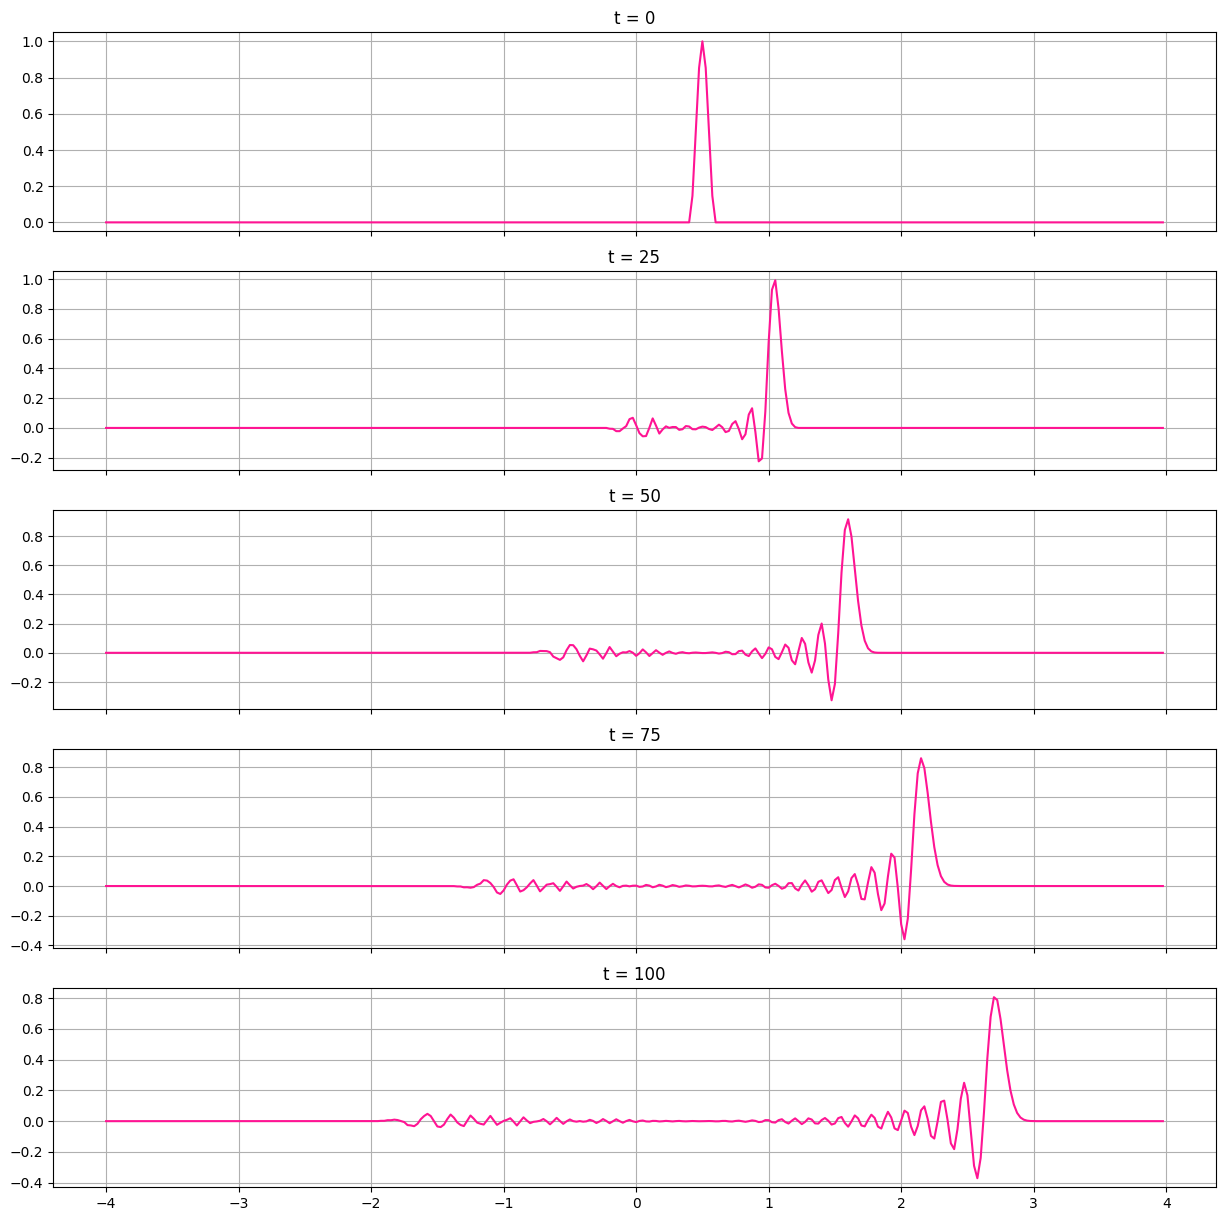

In [2]:
H=1
g=1
dx=0.025

c=(g*H)**(1/2)
CFL=0.9
dt=CFL*dx/c

x=np.arange(-4,4,dx)
t=np.arange(0,dt*100,dt)
h=np.zeros(shape=(len(x),len(t)))
u=np.zeros(shape=(len(x),len(t)))

for i in range(len(x)):
    if x[i]>=0.4 and x[i]<=0.6:
        u[i,0] = h[i,0] =1/2+1/2*np.cos(10*np.pi*(x[i]-0.5))
        
for j in range(0,len(t)-1):
    for i in range(0,len(x)-1):
        #FTUS
        if j==0 and i==0:
            u[i,j+1] = u[i,j]-g*dt/(dx)*(h[i+1,j]-h[i,j])
            h[i,j+1] = h[i,j]-H*dt/(dx)*(u[i+1,j]-u[i,j])
        #FTCS
        elif j==0 and i!=0:
            u[i,j+1] = u[i,j]-g*dt/(2*dx)*(h[i+1,j]-h[i-1,j])
            h[i,j+1] = h[i,j]-H*dt/(2*dx)*(u[i+1,j]-u[i-1,j])
        #CTFS
        elif j!=0 and i==0:
            u[i,j+1] = u[i,j-1]-g*2*dt/dx*(h[i+1,j]-h[i,j])
            h[i,j+1] = h[i,j-1]-H*2*dt/dx*(u[i+1,j]-u[i,j])
        #CTCS
        else:
            u[i,j+1] = u[i,j-1]-g*dt/dx*(h[i+1,j]-h[i-1,j])
            h[i,j+1] = h[i,j-1]-H*dt/dx*(u[i+1,j]-u[i-1,j])
            
fig,ax=plt.subplots(5,1,figsize=(15,15),sharex=True)
for i in range(5):
    ax[i].plot(x,h[:,i*25],color='deeppink')
    ax[i].set_title(f't = {i*25}')
    ax[i].grid(True)

As time goes on, the wave starts to spread out and propagates to the right.